In [67]:

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import nfl_data_py  as nfl
#import data_visualization as dv

import nfl_plot_py as nfl_plot


In [68]:
draft_picks = nfl.import_draft_picks
selected_draft_picks = draft_picks(years = range(2014,2019))

In [69]:
print([x for x in range(2014,2019)])

[2014, 2015, 2016, 2017, 2018]


In [70]:
print(3)

3


In [71]:
draft_vals = nfl.import_draft_values()

In [72]:
selected_draft_picks

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
9593,2014,1,1,HOU,00-0031364,ClowJa00,jadeveon-clowney-1,Jadeveon Clowney,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,1.0,52.5
9594,2014,1,2,STL,None,RobiGr01,greg-robinson-3,Greg Robinson,False,T,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
9595,2014,1,3,JAX,00-0031407,BortBl00,blake-bortles-1,Blake Bortles,False,QB,...,75.0,283.0,1766.0,8.0,1.0,20.0,1.0,NaN,NaN,NaN
9596,2014,1,4,BUF,00-0031325,WatkSa00,sammy-watkins-1,Sammy Watkins,False,WR,...,1.0,11.0,76.0,0.0,364.0,5384.0,34.0,1.0,NaN,NaN
9597,2014,1,5,OAK,00-0031040,MackKh00,khalil-mack-1,Khalil Mack,False,LB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.0,3.0,101.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11892,2017,7,249,SEA,00-0033594,CarsCh00,chris-carson-1,Chris Carson,False,RB,...,0.0,769.0,3502.0,24.0,107.0,804.0,7.0,NaN,NaN,NaN
11893,2017,7,250,DET,00-0033595,OConPa00,pat-oconnor-1,Pat O'Connor,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,1.5
11894,2017,7,251,CIN,00-0033798,SchrMa00,mason-schreck-1,Mason Schreck,False,TE,...,0.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,NaN,NaN
11895,2017,7,252,CLE,00-0033596,DayeMa00,matt-dayes-1,Matthew Dayes,False,RB,...,0.0,5.0,13.0,0.0,4.0,29.0,0.0,9.0,NaN,NaN


In [73]:
selected_draft_picks['pick_value'] = selected_draft_picks.apply(lambda row: draft_vals.loc[row['pick']-1,'johnson'],axis = 1)
                                                         #  (lambda row: find_winner(row['result'],row['home_team'],row['away_team']), axis=1)

In [74]:
selected_draft_picks

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks,pick_value
9593,2014,1,1,HOU,00-0031364,ClowJa00,jadeveon-clowney-1,Jadeveon Clowney,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,248.0,1.0,52.5,3000
9594,2014,1,2,STL,None,RobiGr01,greg-robinson-3,Greg Robinson,False,T,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2600
9595,2014,1,3,JAX,00-0031407,BortBl00,blake-bortles-1,Blake Bortles,False,QB,...,283.0,1766.0,8.0,1.0,20.0,1.0,NaN,NaN,NaN,2200
9596,2014,1,4,BUF,00-0031325,WatkSa00,sammy-watkins-1,Sammy Watkins,False,WR,...,11.0,76.0,0.0,364.0,5384.0,34.0,1.0,NaN,NaN,1800
9597,2014,1,5,OAK,00-0031040,MackKh00,khalil-mack-1,Khalil Mack,False,LB,...,0.0,0.0,0.0,0.0,0.0,0.0,442.0,3.0,101.5,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11892,2017,7,249,SEA,00-0033594,CarsCh00,chris-carson-1,Chris Carson,False,RB,...,769.0,3502.0,24.0,107.0,804.0,7.0,NaN,NaN,NaN,0
11893,2017,7,250,DET,00-0033595,OConPa00,pat-oconnor-1,Pat O'Connor,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,1.5,0
11894,2017,7,251,CIN,00-0033798,SchrMa00,mason-schreck-1,Mason Schreck,False,TE,...,0.0,0.0,0.0,2.0,6.0,0.0,1.0,NaN,NaN,0
11895,2017,7,252,CLE,00-0033596,DayeMa00,matt-dayes-1,Matthew Dayes,False,RB,...,5.0,13.0,0.0,4.0,29.0,0.0,9.0,NaN,NaN,0


In [75]:
offset_list = [['GNB', 'GB'],
 ['KAC', 'KC'],
 ['KAN', 'KC'],
 ['LA', 'LAR'],
 ['LVR', 'LV'],
 ['NOR', 'NO'],
 ['NWE', 'NE'],
 ['OAK', 'LV'],
 ['SD', 'SDG'],
 ['SDG', 'LAC'],
 ['SFO', 'SF'],
 ['STL', 'LAR'],
 ['TAM', 'TB']]

In [76]:
team_win_v_picks = pd.DataFrame()

In [77]:
temp_df_draft= selected_draft_picks.groupby(['team']).count()['round']

temp_df_draft.index.names = ['team']

temp_df_draft = temp_df_draft.reset_index()
for i in range(len(offset_list)):
    temp_df_draft.loc[temp_df_draft['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft = temp_df_draft.groupby('team').sum()


temp_df_draft_top100= selected_draft_picks[selected_draft_picks['pick'] <= 100].groupby(['team']).count()['round']
temp_df_draft_top100.index.names = ['team']

temp_df_draft_top100 = temp_df_draft_top100.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_top100.loc[temp_df_draft_top100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_top100 = temp_df_draft_top100.groupby('team').sum()



temp_df_draft_after100= selected_draft_picks[selected_draft_picks['pick'] > 100].groupby(['team']).count()['round']
temp_df_draft_after100.index.names = ['team']

temp_df_draft_after100 = temp_df_draft_after100.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_after100.loc[temp_df_draft_after100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_after100 = temp_df_draft_after100.groupby('team').sum()

temp_df_draft_rnd_1= selected_draft_picks[selected_draft_picks['round'] == 1].groupby(['team']).count()['round']
temp_df_draft_rnd_1.index.names = ['team']

temp_df_draft_rnd_1 = temp_df_draft_rnd_1.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_rnd_1.loc[temp_df_draft_rnd_1['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_rnd_1 = temp_df_draft_rnd_1.groupby('team').sum()


In [78]:
temp_df_draftval= selected_draft_picks.groupby(['team'])['pick_value'].sum()

temp_df_draftval.index.names = ['team']

temp_df_draftval = temp_df_draftval.reset_index()
for i in range(len(offset_list)):
    temp_df_draftval.loc[temp_df_draftval['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draftval = temp_df_draftval.groupby('team').sum()


temp_df_draftval_top100= selected_draft_picks[selected_draft_picks['pick'] <= 100].groupby(['team'])['pick_value'].sum()
temp_df_draftval_top100.index.names = ['team']

temp_df_draftval_top100 = temp_df_draftval_top100.reset_index()
for i in range(len(offset_list)):
    temp_df_draftval_top100.loc[temp_df_draftval_top100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draftval_top100 = temp_df_draftval_top100.groupby('team').sum()



temp_df_draftval_after100= selected_draft_picks[selected_draft_picks['pick'] > 100].groupby(['team'])['pick_value'].sum()
temp_df_draftval_after100.index.names = ['team']

temp_df_draftval_after100 = temp_df_draftval_after100.reset_index()
for i in range(len(offset_list)):
    temp_df_draftval_after100.loc[temp_df_draftval_after100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draftval_after100 = temp_df_draftval_after100.groupby('team').sum()

temp_df_draftval_rnd_1= selected_draft_picks[selected_draft_picks['round'] == 1].groupby(['team'])['pick_value'].sum()
temp_df_draftval_rnd_1.index.names = ['team']

temp_df_draftval_rnd_1 = temp_df_draftval_rnd_1.reset_index()
for i in range(len(offset_list)):
    temp_df_draftval_rnd_1.loc[temp_df_draftval_rnd_1['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draftval_rnd_1 = temp_df_draftval_rnd_1.groupby('team').sum()


In [79]:
team_win_v_picks['all_picks'] = temp_df_draft
team_win_v_picks['top_100_picks'] = temp_df_draft_top100
team_win_v_picks['after_100_picks'] = temp_df_draft_after100
team_win_v_picks['round_1_picks'] = temp_df_draft_rnd_1

team_win_v_picks['all_picks_val'] = temp_df_draftval
team_win_v_picks['top_100_picks_val'] = temp_df_draftval_top100
team_win_v_picks['after_100_picks_val'] = temp_df_draftval_after100
team_win_v_picks['round_1_picks_val'] = temp_df_draftval_rnd_1

In [80]:
schedules = nfl.import_schedules(years = range(2014,2024))

In [81]:
def find_winner(point_dif,home,away):


    if point_dif > 0:
        winner = home
    elif point_dif < 0:
        winner = away

    else:
        winner = 'tie'


    return winner

In [82]:
schedules['winning_id'] = schedules.apply(lambda row: find_winner(row['result'],row['home_team'],row['away_team']), axis=1)

In [83]:
schedules.season

3981    2014
3982    2014
3983    2014
3984    2014
3985    2014
        ... 
6701    2023
6702    2023
6703    2023
6704    2023
6705    2023
Name: season, Length: 2725, dtype: int64

In [84]:
temp_df =  schedules[schedules['game_type'] == 'REG'].groupby(['winning_id']).count()['game_id']

temp_df.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df = temp_df.reset_index()
for i in range(len(offset_list)):
    temp_df.loc[temp_df['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df = temp_df.groupby('team').sum()

temp_df_post =  schedules[schedules['game_type'] != 'REG'].groupby(['winning_id']).count()['game_id']

temp_df_post.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df_post = temp_df_post.reset_index()
for i in range(len(offset_list)):
    temp_df_post.loc[temp_df_post['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_post = temp_df_post.groupby('team').sum()

#temp_df_post.fillna(0)

In [85]:
temp_df_pre =  schedules[(schedules['game_type'] == 'REG') & (schedules['season']<=2018)].groupby(['winning_id']).count()['game_id']

temp_df_pre.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df_pre = temp_df_pre.reset_index()
for i in range(len(offset_list)):
    temp_df_pre.loc[temp_df_pre['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_pre = temp_df_pre.groupby('team').sum()

temp_df_after =  schedules[(schedules['game_type'] == 'REG') & (schedules['season']>2018)].groupby(['winning_id']).count()['game_id']

temp_df_after.index.names = ['team']

temp_df_after = temp_df_after.reset_index()
for i in range(len(offset_list)):
    temp_df_after.loc[temp_df_after['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_after = temp_df_after.groupby('team').sum()

In [86]:
temp_df_after

,game_id
team,
ARI,32
ATL,32
BAL,56
BUF,58
CAR,24
CHI,32
CIN,37
CLE,43
DAL,50


In [44]:
schedules[schedules['season']>2018]['season'].unique()

array([2019, 2020, 2021, 2022, 2023], dtype=int64)

In [21]:
temp_df_post

,game_id
team,
ARI,1
ATL,3
BAL,3
BUF,5
CAR,3
CIN,5
CLE,1
DAL,3
DEN,3


In [22]:
schedules['game_type'].unique()

array(['REG', 'WC', 'DIV', 'CON', 'SB'], dtype=object)

In [23]:
len(temp_df)

33

In [87]:
team_win_v_picks['reg_wins']  = temp_df
team_win_v_picks['post_wins']  = temp_df_post
team_win_v_picks['reg_wins_pre2018']  = temp_df_pre
team_win_v_picks['reg_wins_after2018']  = temp_df_after


In [64]:
temp_df_post

,game_id
team,
ARI,1
ATL,3
BAL,3
BUF,5
CAR,3
CIN,5
CLE,1
DAL,3
DEN,3


In [88]:
team_win_v_picks['post_wins'] = team_win_v_picks['post_wins'].fillna(0)

In [89]:
team_win_v_picks['delta'] = team_win_v_picks['reg_wins']  - team_win_v_picks['all_picks'] 

team_win_v_picks['deltawins'] = team_win_v_picks['reg_wins_after2018'] - team_win_v_picks['reg_wins_pre2018']

In [90]:
print(team_win_v_picks)


      all_picks  top_100_picks  after_100_picks  round_1_picks  all_picks_val  \
team                                                                            
ARI          33             15               18              5           7490   
ATL          34             14               20              5           8644   
BAL          48             18               30              6           9622   
BUF          34             14               20              5           9166   
CAR          31             15               16              5           7508   
CHI          35             14               21              5          11941   
CIN          46             17               29              5           8182   
CLE          51             26               25             10          20104   
DAL          44             14               30              5           8376   
DEN          41             16               25              5           7881   
DET          40             

In [91]:
print(team_win_v_picks.sort_values('deltawins'))

      all_picks  top_100_picks  after_100_picks  round_1_picks  all_picks_val  \
team                                                                            
CAR          31             15               16              5           7508   
NE           42             14               28              4           5357   
DEN          41             16               25              5           7881   
HOU          38             16               22              4           9777   
ARI          33             15               18              5           7490   
ATL          34             14               20              5           8644   
DET          40             15               25              5           8179   
PIT          39             16               23              5           6879   
WAS          43             15               28              4           8500   
CIN          46             17               29              5           8182   
SEA          47             

In [92]:
team_desc = nfl.import_team_desc().set_index('team_abbr')


In [93]:
team_desc.index

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LAR', 'LV', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF',
       'STL', 'TB', 'TEN', 'WAS'],
      dtype='object', name='team_abbr')

In [94]:
team_win_v_picks['round_1_picks_val']

team
ARI     4510
ATL     5350
BAL     5560
BUF     5855
CAR     4140
CHI     7950
CIN     4430
CLE    14465
DAL     5015
DEN     4610
DET     4610
GB      3000
HOU     6000
IND     4190
JAX     8540
KC      2960
LAC     6420
LAR     8050
LV      6390
MIA     5155
MIN     4570
NE      2590
NO      6740
NYG     7210
NYJ     7150
PHI     5250
PIT     3830
SEA     1280
SF      7880
TB      7825
TEN     8630
WAS     4580
Name: round_1_picks_val, dtype: int64

LinregressResult(slope=0.421344297461566, intercept=64.3814801573114, rvalue=0.1555869525591035, pvalue=0.3951519421985541, stderr=0.48840724891326565, intercept_stderr=19.64473589138397) 0.02420729980662872
LinregressResult(slope=-1.837323943661972, intercept=109.8644366197183, rvalue=-0.27909952691699624, pvalue=0.12187922439200853, stderr=1.1541329268909806, intercept_stderr=18.237035014070777) 0.0778965459252911
LinregressResult(slope=0.8779111301614516, intercept=59.92177453921989, rvalue=0.296072278030307, pvalue=0.09990212964936954, stderr=0.5170955824693906, intercept_stderr=12.79615682082147) 0.08765879381805541
LinregressResult(slope=-4.0722001137009665, intercept=101.38999431495168, rvalue=-0.3442399176669858, pvalue=0.05369753328852096, stderr=2.0277674028945736, intercept_stderr=10.42009078206064) 0.11850112091537317
LinregressResult(slope=-0.003297003758175358, intercept=112.42008813689783, rvalue=-0.589998030342445, pvalue=0.0003793405606612515, stderr=0.0008237577580245

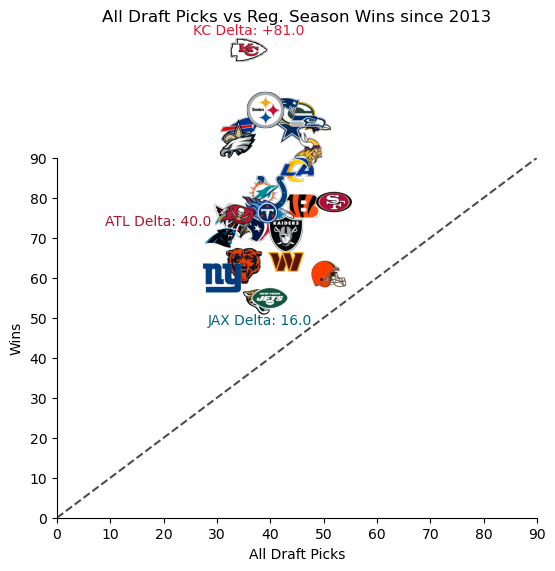

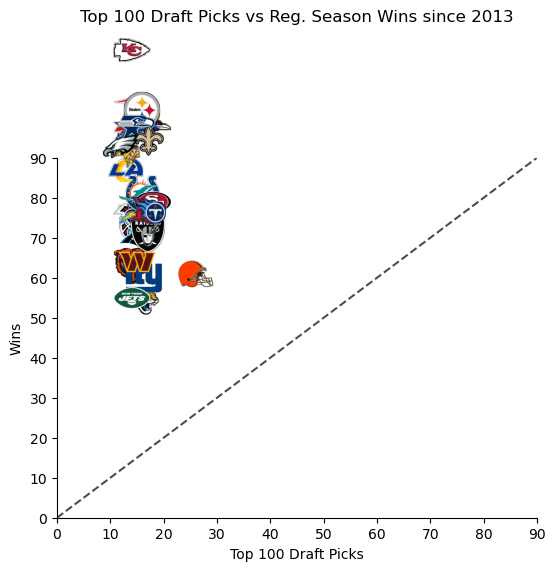

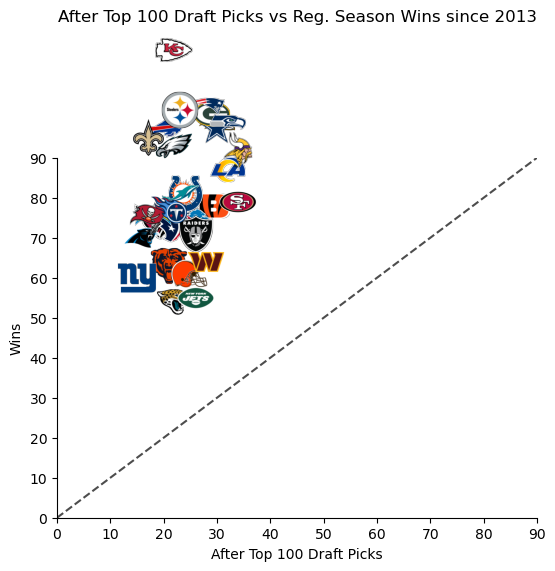

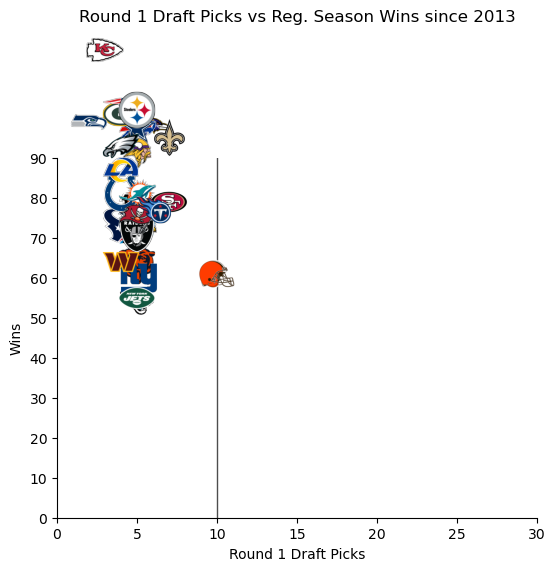

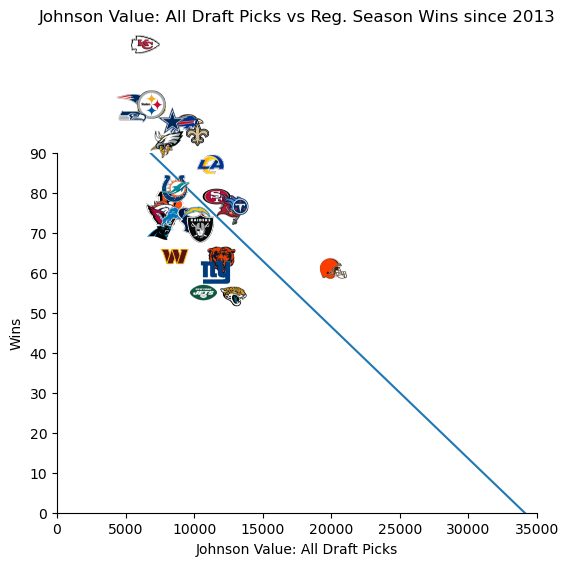

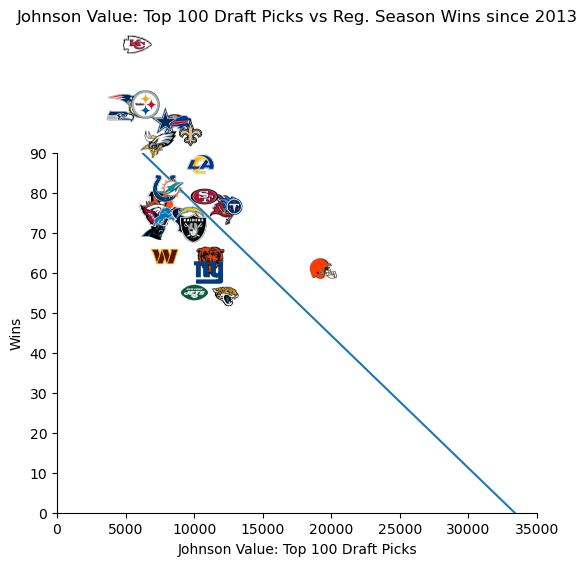

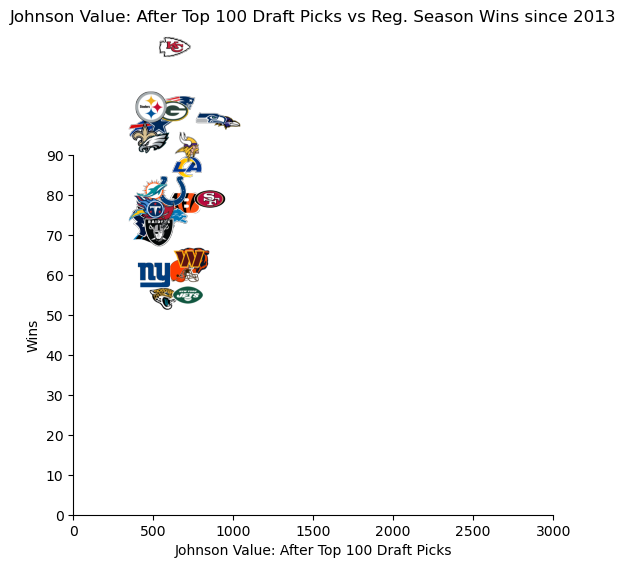

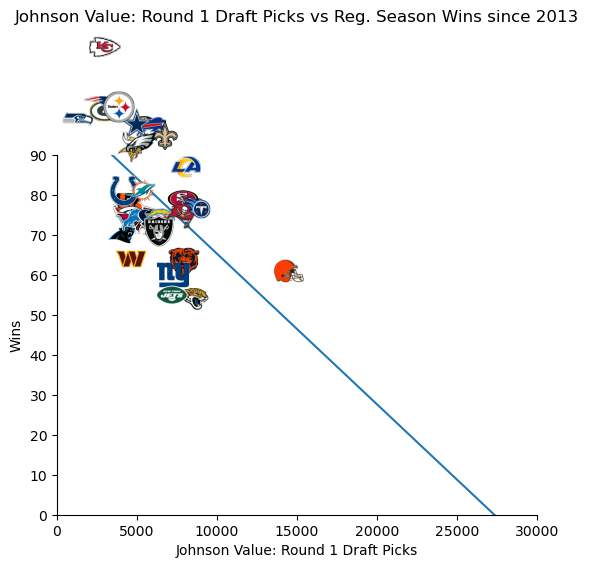

In [95]:
picksets = 3

curr_picks = ['all_picks','top_100_picks','after_100_picks','round_1_picks',
              'all_picks_val','top_100_picks_val','after_100_picks_val','round_1_picks_val',
              ]
curr_pick_label = ['All Draft Picks','Top 100 Draft Picks','After Top 100 Draft Picks','Round 1 Draft Picks',
                   'Johnson Value: All Draft Picks','Johnson Value: Top 100 Draft Picks','Johnson Value: After Top 100 Draft Picks','Johnson Value: Round 1 Draft Picks']


x_bounds = [[0,90],
            [0,90],
            [0,90],
             [0,30],
             [0,35000],
             [0,35000],
             [0,3000],
             [0,30000],]
x_scale = [10,10,10,10,
            2200,2200,210,2100]
for j,curr_pick_option in enumerate(curr_picks):

    curr_fig = plt.figure()
    curr_ax = curr_fig.add_axes([.2,.2,.75,.75])

    for i in range(len(team_win_v_picks)):
    #for i in range(5):

        curr_team = team_win_v_picks.index[i]
        curr_row = team_win_v_picks.loc[curr_team]
        #curr_ax.scatter(curr_row[curr_pick_option],curr_row['reg_wins'],color = team_desc.loc[curr_team,'team_color'])
        nfl_plot.logo_scatter_indiv(curr_ax,curr_row[curr_pick_option],curr_row['reg_wins'],x_scale[j],team_abbr = curr_team)

        #print(curr_team)
                

    unity_color = ".3" if j < 3 else 'none'
    unity_line = curr_ax.plot([0,200],[0,200],color = unity_color,ls = '--')

    #curr_ax.set_xlim([50,140])

    curr_ax.set_xlim(x_bounds[j])
    curr_ax.set_ylim([0,90])

    curr_ax.set_xlabel(curr_pick_label[j])
    curr_ax.set_ylabel('Wins')
    curr_ax.set_title(f'{curr_pick_label[j]} vs Reg. Season Wins since 2013')
    curr_ax.spines['top'].set_visible(False)
    curr_ax.spines['right'].set_visible(False)
    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['reg_wins'])
    print(out,out.rvalue**2)

    if out.pvalue < 0.05:
        curr_ax.plot(np.arange(x_bounds[j][0],x_bounds[j][1]),np.arange(x_bounds[j][0],x_bounds[j][1])*out.slope + out.intercept,
        zorder = -50,)
    best_team = 'KC'
    if j == 0:
        curr_row = team_win_v_picks.loc[best_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['reg_wins'] +3 ,f'{best_team} Delta: +{curr_row["delta"]}' ,color = team_desc.loc[best_team,'team_color'],
                    ha= 'center',va = 'bottom')

        worst_team = 'JAX'

        curr_row = team_win_v_picks.loc[worst_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['reg_wins'] - 3 ,f'{worst_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[worst_team,'team_color'],
                                ha= 'center',va = 'top')

        mid_team = 'ATL'

        curr_row = team_win_v_picks.loc[mid_team]
        curr_ax.text(curr_row[curr_pick_option]-5,curr_row['reg_wins'] ,f'{mid_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[mid_team,'team_color'],
                            ha= 'right',va = 'center')
    if j == 3:
       #unity_line.set_visible(False)
       curr_ax.axvline(10,color = '.3',lw = 1,zorder = -5)


In [96]:
for j,curr_pick_option in enumerate(curr_picks):

    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['reg_wins'])
    print(out,out.rvalue**2)

for j,curr_pick_option in enumerate(curr_picks):

    out = stats.spearmanr(team_win_v_picks[curr_pick_option],team_win_v_picks['reg_wins'])
    print(out)

LinregressResult(slope=0.421344297461566, intercept=64.3814801573114, rvalue=0.1555869525591035, pvalue=0.3951519421985541, stderr=0.48840724891326565, intercept_stderr=19.64473589138397) 0.02420729980662872
LinregressResult(slope=-1.837323943661972, intercept=109.8644366197183, rvalue=-0.27909952691699624, pvalue=0.12187922439200853, stderr=1.1541329268909806, intercept_stderr=18.237035014070777) 0.0778965459252911
LinregressResult(slope=0.8779111301614516, intercept=59.92177453921989, rvalue=0.296072278030307, pvalue=0.09990212964936954, stderr=0.5170955824693906, intercept_stderr=12.79615682082147) 0.08765879381805541
LinregressResult(slope=-4.0722001137009665, intercept=101.38999431495168, rvalue=-0.3442399176669858, pvalue=0.05369753328852096, stderr=2.0277674028945736, intercept_stderr=10.42009078206064) 0.11850112091537317
LinregressResult(slope=-0.003297003758175358, intercept=112.42008813689783, rvalue=-0.589998030342445, pvalue=0.0003793405606612515, stderr=0.0008237577580245

In [97]:
team_win_v_picks.index

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LAR', 'LV', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN',
       'WAS'],
      dtype='object', name='team')

In [98]:
team_win_v_picks

,all_picks,top_100_picks,after_100_picks,round_1_picks,all_picks_val,top_100_picks_val,after_100_picks_val,round_1_picks_val,reg_wins,post_wins,reg_wins_pre2018,reg_wins_after2018,delta,deltawins
team,,,,,,,,,,,,,,
ARI,33,15,18,5,7490,6998,492,4510,74,1.0,42,32,41,-10
ATL,34,14,20,5,8644,8075,569,5350,74,3.0,42,32,40,-10
BAL,48,18,30,6,9622,8674,948,5560,98,3.0,42,56,50,14
BUF,34,14,20,5,9166,8727,439,5855,97,5.0,39,58,63,19
CAR,31,15,16,5,7508,7041,467,4140,70,3.0,46,24,39,-22
CHI,35,14,21,5,11941,11185,756,7950,63,0.0,31,32,28,1
CIN,46,17,29,5,8182,7484,698,4430,78,5.0,41,37,32,-4
CLE,51,26,25,10,20104,19412,692,14465,61,1.0,18,43,10,25
DAL,44,14,30,5,8376,7843,533,5015,98,3.0,48,50,54,2


In [99]:
team_desc.loc[curr_team,'team_color']

'#5A1414'

LinregressResult(slope=0.7205934930282446, intercept=-27.21987844118699, rvalue=0.34674052318788673, pvalue=0.05186905376181813, stderr=0.3558852036439054, intercept_stderr=14.314428888579977) 0.12022899042060942
LinregressResult(slope=2.4316901408450704, intercept=-36.526408450704224, rvalue=0.4813487071010819, pvalue=0.005284718702049592, stderr=0.8084518902021368, intercept_stderr=12.774755043619658) 0.23169657782788314
LinregressResult(slope=0.3705529361337334, intercept=-7.493999142734676, rvalue=0.16284546141215062, pvalue=0.37319339292374387, stderr=0.4098998803279019, intercept_stderr=10.143469268222324) 0.026518644302536237
LinregressResult(slope=4.265491756679932, intercept=-19.725412166003412, rvalue=0.46987185789793395, pvalue=0.0066588733903143295, stderr=1.463050147896253, intercept_stderr=7.518177547397341) 0.22077956284445624
LinregressResult(slope=0.002513049183907794, intercept=-22.36123888640566, rvalue=0.5860171393323593, pvalue=0.00042477696644219805, stderr=0.0006

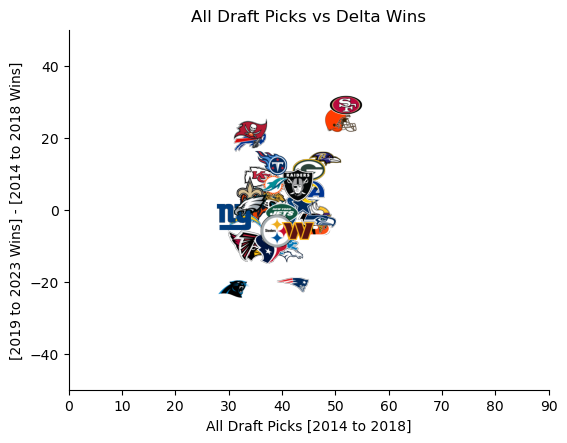

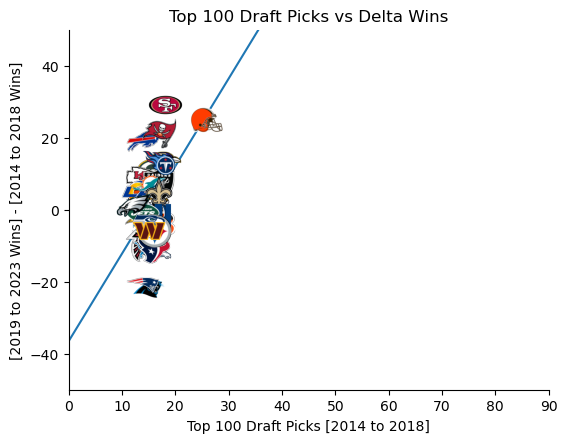

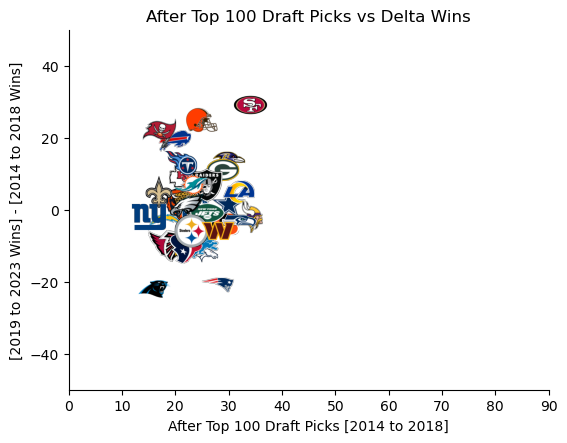

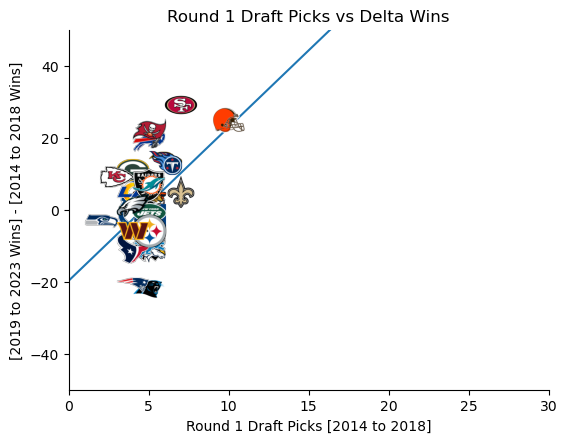

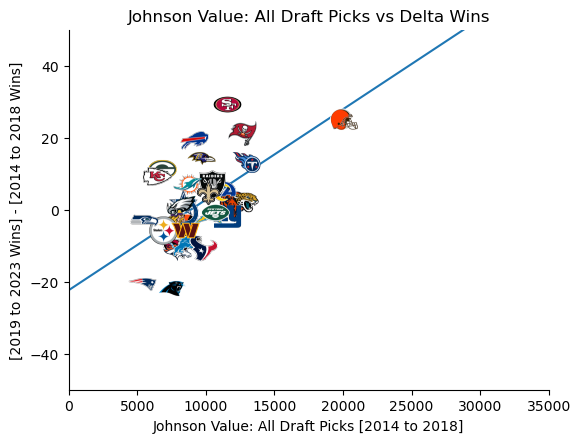

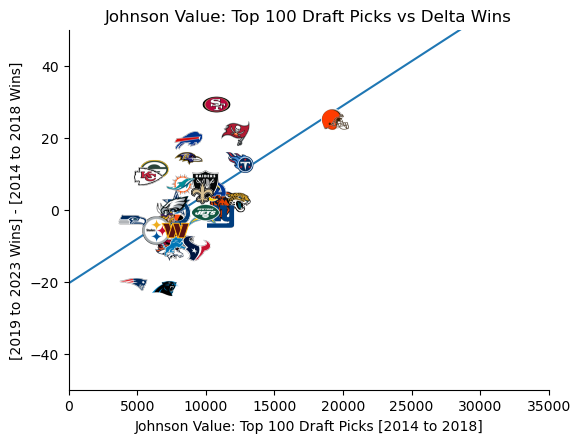

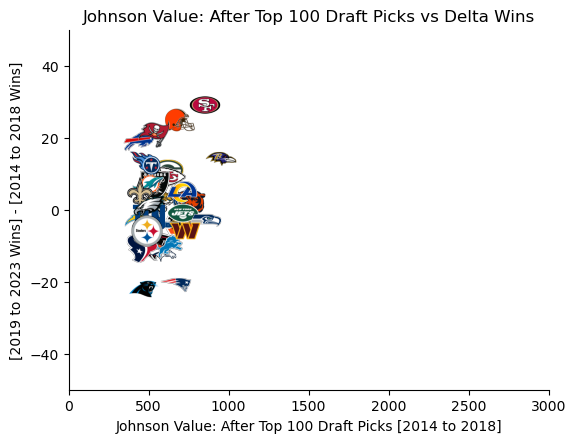

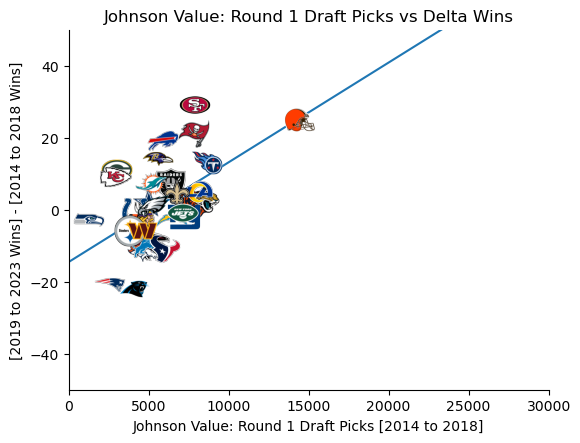

In [100]:
picksets = 3

curr_picks = ['all_picks','top_100_picks','after_100_picks','round_1_picks',
              'all_picks_val','top_100_picks_val','after_100_picks_val','round_1_picks_val',
              ]
curr_pick_label = ['All Draft Picks','Top 100 Draft Picks','After Top 100 Draft Picks','Round 1 Draft Picks',
                   'Johnson Value: All Draft Picks','Johnson Value: Top 100 Draft Picks','Johnson Value: After Top 100 Draft Picks','Johnson Value: Round 1 Draft Picks']


x_bounds = [[0,90],
            [0,90],
            [0,90],
             [0,30],
             [0,35000],
             [0,35000],
             [0,3000],
             [0,30000],]
x_scale = [10,10,10,10,
            2200,2200,210,2100]
for j,curr_pick_option in enumerate(curr_picks):

    curr_fig = plt.figure()
    curr_ax = curr_fig.add_axes([.2,.2,.75,.75])

    for i in range(len(team_win_v_picks)):
    #for i in range(5):

        curr_team = team_win_v_picks.index[i]
        curr_row = team_win_v_picks.loc[curr_team]
        #curr_ax.scatter(curr_row[curr_pick_option],curr_row['reg_wins'],color = team_desc.loc[curr_team,'team_color'])
        nfl_plot.logo_scatter_indiv(curr_ax,curr_row[curr_pick_option],curr_row['deltawins'],x_scale[j],team_abbr = curr_team)

        #print(curr_team)
                

#    unity_color = ".3" if j < 3 else 'none'
 #   unity_line = curr_ax.plot([0,200],[0,200],color = unity_color,ls = '--')

    #curr_ax.set_xlim([50,140])

    curr_ax.set_xlim(x_bounds[j])
    curr_ax.set_ylim([-50,50])

    curr_ax.set_xlabel(f'{curr_pick_label[j]} [2014 to 2018]')
    curr_ax.set_ylabel('[2019 to 2023 Wins] - [2014 to 2018 Wins]')
    curr_ax.set_title(f'{curr_pick_label[j]} vs Delta Wins')
    curr_ax.spines['top'].set_visible(False)
    curr_ax.spines['right'].set_visible(False)
    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['deltawins'])
    print(out,out.rvalue**2)

    if out.pvalue < 0.05:
        curr_ax.plot(np.arange(x_bounds[j][0],x_bounds[j][1]),np.arange(x_bounds[j][0],x_bounds[j][1])*out.slope + out.intercept,
        zorder = -50,)


In [102]:
team_wins_v_picks_sans_browns = team_win_v_picks.drop('CLE')


for j,curr_pick_option in enumerate(curr_picks):

    out = stats.linregress(team_wins_v_picks_sans_browns[curr_pick_option],team_wins_v_picks_sans_browns['deltawins'])
    print(out,out.rvalue**2)

for j,curr_pick_option in enumerate(curr_picks):

    out = stats.spearmanr(team_wins_v_picks_sans_browns[curr_pick_option],team_wins_v_picks_sans_browns['deltawins'])
    print(out)

LinregressResult(slope=0.5263416345142057, intercept=-20.05534900035076, rvalue=0.2537034396990602, pvalue=0.16846056242521207, stderr=0.37264517222043986, intercept_stderr=14.840903461652701) 0.06436543531513467
LinregressResult(slope=2.705539358600584, intercept=-40.658892128279895, rvalue=0.35037778543245895, pvalue=0.05330869937976725, stderr=1.3430011055943174, intercept_stderr=20.628754208359315) 0.12276459252455425
LinregressResult(slope=0.34826568265682656, intercept=-7.704870848708485, rvalue=0.16366482464517487, pvalue=0.37899281201410384, stderr=0.3898167250497287, intercept_stderr=9.643279036996555) 0.02678617482613584
LinregressResult(slope=3.8926174496644292, intercept=-17.999999999999996, rvalue=0.33225422062688126, pvalue=0.06782537730718737, stderr=2.0519716105160035, intercept_stderr=10.059320313601827) 0.11039286712437629
LinregressResult(slope=0.002779916422559195, intercept=-24.69839998394297, rvalue=0.503536891382126, pvalue=0.0038803491826722523, stderr=0.0008857

In [ ]:
newrun

In [36]:
rvalue=-0.7806731821622144


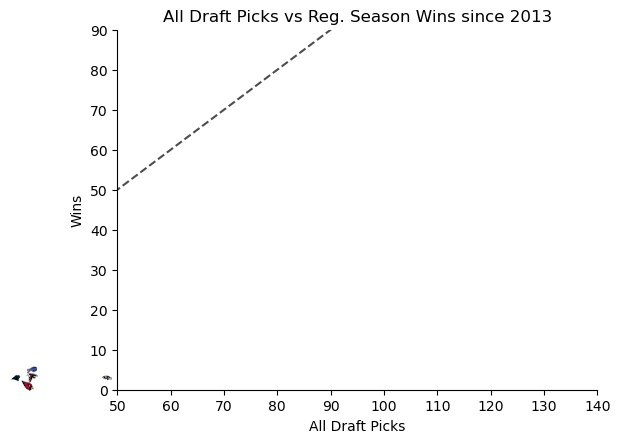

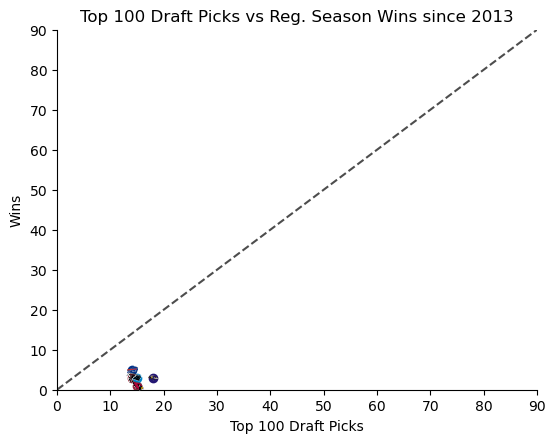

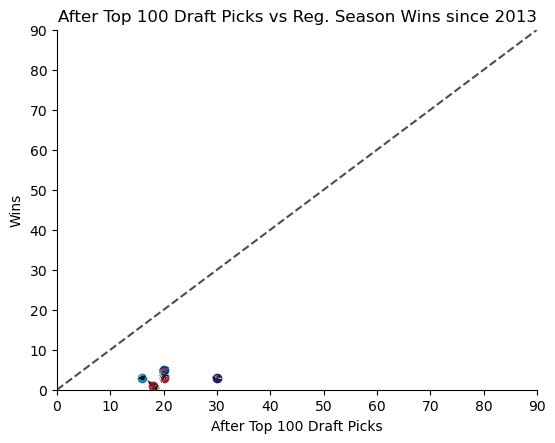

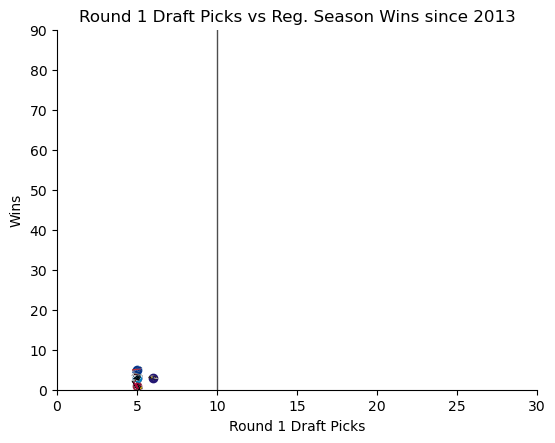

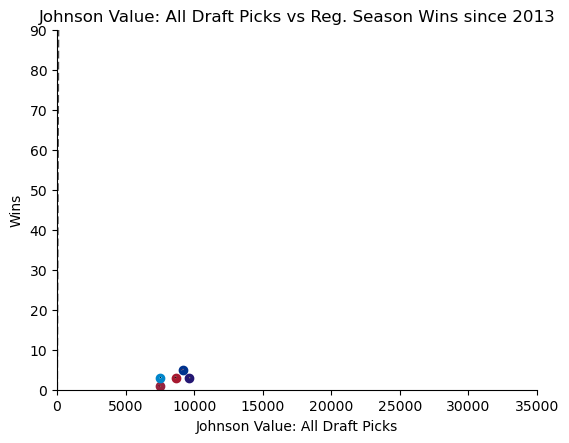

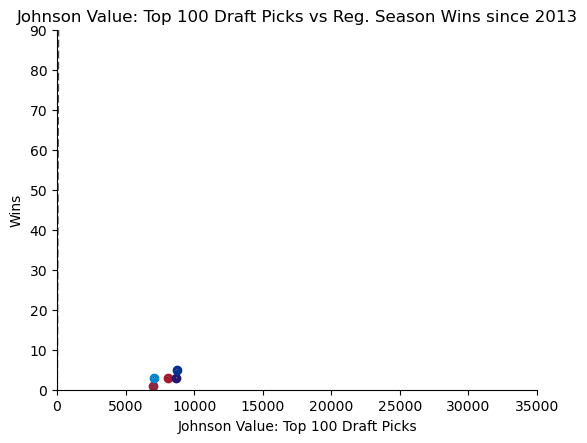

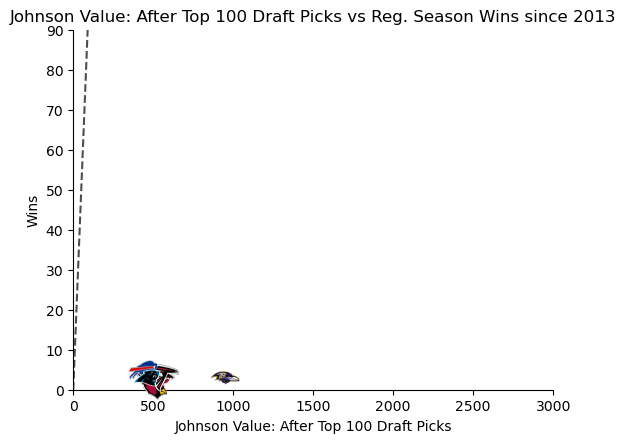

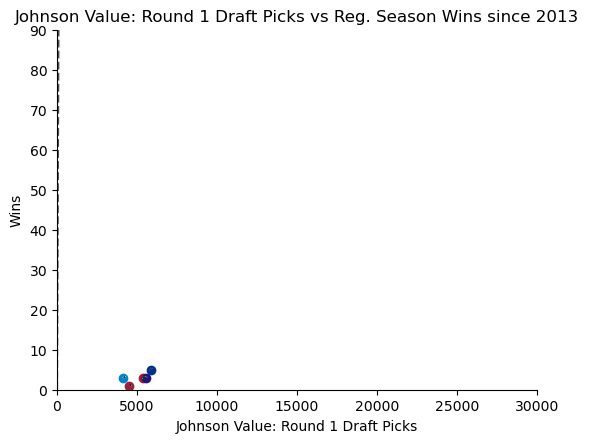

In [37]:
picksets = 3

curr_picks = ['all_picks','top_100_picks','after_100_picks','round_1_picks',
              'all_picks_val','top_100_picks_val','after_100_picks_val','round_1_picks_val',
              ]
curr_pick_label = ['All Draft Picks','Top 100 Draft Picks','After Top 100 Draft Picks','Round 1 Draft Picks',
                   'Johnson Value: All Draft Picks','Johnson Value: Top 100 Draft Picks','Johnson Value: After Top 100 Draft Picks','Johnson Value: Round 1 Draft Picks']


x_bounds = [[50,140],
            [0,90],
            [0,90],
             [0,30],
             [0,35000],
             [0,35000],
             [0,3000],
             [0,30000],]
x_scale = [3,3,3,3,
            200,200,200,200]
for j,curr_pick_option in enumerate(curr_picks):

    curr_fig = plt.figure()
    curr_ax = curr_fig.add_axes([.2,.2,.75,.75])
    curr_ax.set_xlim(x_bounds[j])
    curr_ax.set_ylim([0,90])
    #for i in range(len(team_win_v_picks)):
    for i in range(5):

        curr_team = team_win_v_picks.index[i]
        curr_row = team_win_v_picks.loc[curr_team]
        curr_ax.scatter(curr_row[curr_pick_option],curr_row['post_wins'],color = team_desc.loc[curr_team,'team_color'])
        nfl_plot.logo_scatter_indiv(curr_ax,curr_row[curr_pick_option],curr_row['post_wins'],x_scale[j],team_abbr = curr_team)
        #print(curr_team)
                

    unity_color = ".3" if j != 3 else 'none'
    unity_line = curr_ax.plot([0,200],[0,200],color = unity_color,ls = '--')

    #curr_ax.set_xlim([50,140])



    curr_ax.set_xlabel(curr_pick_label[j])
    curr_ax.set_ylabel('Wins')
    curr_ax.set_title(f'{curr_pick_label[j]} vs Reg. Season Wins since 2013')
    curr_ax.spines['top'].set_visible(False)
    curr_ax.spines['right'].set_visible(False)

    best_team = 'KC'
    if j < 0:
        curr_row = team_win_v_picks.loc[best_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['post_wins'] +3 ,f'{best_team} Delta: +{curr_row["delta"]}' ,color = team_desc.loc[best_team,'team_color'],
                    ha= 'center',va = 'bottom')

        worst_team = 'JAX'

        curr_row = team_win_v_picks.loc[worst_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['post_wins'] - 3 ,f'{worst_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[worst_team,'team_color'],
                                ha= 'center',va = 'top')

        mid_team = 'ATL'

        curr_row = team_win_v_picks.loc[mid_team]
        curr_ax.text(curr_row[curr_pick_option]-5,curr_row['post_wins'] ,f'{mid_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[mid_team,'team_color'],
                            ha= 'right',va = 'center')
    if j == 3:
#        unity_line.set_visible(False)
        curr_ax.axvline(10,color = '.3',lw = 1,zorder = -5)


In [38]:
for j,curr_pick_option in enumerate(curr_picks):

    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['post_wins'].fillna(0))
    print(out)

for j,curr_pick_option in enumerate(curr_picks):

    out = stats.spearmanr(team_win_v_picks[curr_pick_option],team_win_v_picks['post_wins'].fillna(0))
    print(out)

LinregressResult(slope=0.06495054224764629, intercept=1.101656536765582, rvalue=0.10722222058658258, pvalue=0.5591552425456285, stderr=0.10995790057020599, intercept_stderr=4.422731072642941)
LinregressResult(slope=-0.26901408450704223, intercept=7.890845070422535, rvalue=-0.1826898193160859, pvalue=0.31692934664155026, stderr=0.26431933221589926, intercept_stderr=4.176642745565213)
LinregressResult(slope=0.13244749249892843, intercept=0.4839262751821689, rvalue=0.19969026482619245, pvalue=0.2731845835645808, stderr=0.11865603655110879, intercept_stderr=2.9362874155572394)
LinregressResult(slope=-0.8789084707220012, intercept=8.054576463899943, rvalue=-0.3321557153964985, pvalue=0.06326454518711837, stderr=0.4556762525664461, intercept_stderr=2.3415841048601895)
LinregressResult(slope=-0.000420134860160139, intercept=7.671428811468518, rvalue=-0.33611337890066106, pvalue=0.05999455126379583, stderr=0.00021493686278133055, intercept_stderr=2.1235887975191736)
LinregressResult(slope=-0.0

In [39]:
curr_team

'CAR'

In [40]:
curr_row = team_win_v_picks.loc[curr_team]
print(curr_row)

all_picks                31.0
top_100_picks            15.0
after_100_picks          16.0
round_1_picks             5.0
all_picks_val          7508.0
top_100_picks_val      7041.0
after_100_picks_val     467.0
round_1_picks_val      4140.0
reg_wins                 70.0
post_wins                 3.0
reg_wins_pre2018         46.0
reg_wins_after2018       24.0
delta                    39.0
deltawins               -22.0
Name: CAR, dtype: float64


In [41]:
team_win_v_picks.index

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LAR', 'LV', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN',
       'WAS'],
      dtype='object', name='team')

In [42]:
team_win_v_picks = team_win_v_picks.reset_index()

In [43]:
#team_win_v_picks


for i in range(len(offset_list)):
    team_win_v_picks[team_win_v_picks['team'] == offset_list[i][0]]['team'] = offset_list[i][1]

